In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb
import re 
import math
import warnings
warnings.filterwarnings('ignore')

In [21]:
from Lib_final_test import *

# 1. Read file & General information

In [3]:
df = pd.read_excel('House_data.xlsx', engine='openpyxl')

In [4]:
df.head(3)

,ID,Noi_dung,Dia_chi,Gia,Nha_ve_sinh,So_phong,Huong,Chieu_dai,Rong,Giay_to,Cau_truc,Dien_tich,Dien_tich_su_dung,Hem_rong,Duong_mat_tien,Tien_ich,Duong,Phuong,Quan
0,149065,Bán nhà 134.7m2 Tân Hiệp Hóc Môn. Cách Đỗ Văn ...,"Đường ấp Thới Tây 2, Xã Tân Hiệp, Huyện Hóc Môn","3,7 tỷ 35,4 triệu/m²",4,3,Đ.Bắc,20.71,5.00,Sổ hồng,1 trệt + 1 lầu,104.5,134.7,5.0,0.0,"Gần chợ, siêu thị Gần bệnh viện Gần công viên,...",Đường ấp Thới Tây 2,Xã Tân Hiệp,Huyện Hóc Môn
1,231326,Bán Nhà Nát Gần Mặt Tiền Đường Hậu Giang P11 Q...,"Đường Hậu Giang, Phường 11, Quận 6","3,9 tỷ 92,2 triệu/m²",1,--,Tây,12.90,3.00,Sổ hồng,1 trệt,42.3,87.7,6.1,0.0,"Gần chợ, siêu thị Gần công viên, trung tâm Di ...",Đường Hậu Giang,Phường 11,Quận 6
2,184984,Bán nhà riêng Quận Gò Vấp - Nhà còn mới phù hợ...,"Đường Nguyễn Thượng Hiền, Phường 1, Quận Gò Vấp",2 tỷ 99 triệu/m²,2,--,T.Nam,3.20,4.65,Sổ hồng,"1 trệt, 1 lửng",20.2,150,3.0,0.0,"Gần chợ, siêu thị Gần công viên, trung tâm Gầ...",Đường Nguyễn Thượng Hiền,Phường 1,Quận Gò Vấp


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4386 non-null   int64  
 1   Noi_dung           4386 non-null   object 
 2   Dia_chi            4386 non-null   object 
 3   Gia                4386 non-null   object 
 4   Nha_ve_sinh        4386 non-null   object 
 5   So_phong           4386 non-null   object 
 6   Huong              4386 non-null   object 
 7   Chieu_dai          4386 non-null   float64
 8   Rong               4386 non-null   float64
 9   Giay_to            4386 non-null   object 
 10  Cau_truc           4386 non-null   object 
 11  Dien_tich          4386 non-null   object 
 12  Dien_tich_su_dung  4386 non-null   object 
 13  Hem_rong           4386 non-null   float64
 14  Duong_mat_tien     4386 non-null   float64
 15  Tien_ich           3551 non-null   object 
 16  Duong              4386 

In [6]:
df.shape

(4386, 19)

In [7]:
# df.describe()

# 2. EDA

#### Column 'Noi_dung':
- Drop những rao bán đất nền, biệt thự, villa, nhà trọ, căn hộ dịch vụ, khách sạn

In [8]:
df = noi_dung_clean('Noi_dung',df)

#### Column 'Dien_tich' & 'Dien_tich_su_dung'
- Sửa lại lỗi chính tả, xóa dấu '.' phân cách hàng ngàn & Đổi sang kiểu float

In [9]:
df = dien_tich_clean(['Dien_tich','Dien_tich_su_dung'], df)

#### Column 'Gia'
- Lấy ra số tiền tổng và chuyển thành đơn vị 'triệu đồng'
- Đối với những căn 'Đã bán' => Drop

In [10]:
df = gia_clean('Gia',df)

#### Column 'Cau_truc'
- Loại bỏ ' ', '+' bằng replace() sau đó split()
- Tính score cho cấu trúc: 
    + 'trệt', 'lầu', 'hầm': 1 điểm
    + 'lửng', 'tầngthượng', 'ápmái', 'gácsuốt': 0.5 điểm

In [11]:
df = cau_truc_clean('Cau_truc',df)

#### Column 'Tien_ich'
- Tạo cột số lượng tiện ích 'so_tien_ich'
    - Đổi null thành '0' 
    - lowercase các dòng 
    - build function count_tien_ich() để count những tên tiện ích xuất hiện trên dòng

In [12]:
df = tien_ich_clean('Tien_ich', df)

#### Column 'Nha_ve_sinh' & 'So_phong'
- Xử lý missing value '--', '  --  '
- Đổi kiểu dữ liệu int

In [13]:
df = so_phong_nvs_clean('Nha_ve_sinh', df)
df = so_phong_nvs_clean('So_phong', df)

#### Column 'Phuong', 'Quan'
- combine 2 cột thành 1 cột Địa điểm

In [14]:
df = phuong_quan_combine('Quan', 'Phuong','Dia_diem', df)

#### Column 'Giay_to'
- Đổi 'Sổ Hồng','Sổ đỏ' thành 1
- Đổi Giấy chứng nhận phường quận', 'Khác' thành 0

In [15]:
df = giay_to_clean('Giay_to', df)

#### Column 'Huong'
- Label các hướng từ 1 - 8, Không xác định: 0

In [16]:
df = huong_clean('Huong', df)

#### Column 'Hem_rong', 'Duong_mat_tien'
- Gộp 2 cột lại 

In [17]:
df['Hem_duong'] = df['Hem_rong'] + df['Duong_mat_tien']

In [18]:
df.shape

(4055, 21)

In [19]:
df.head(3)

,ID,Noi_dung,Dia_chi,Gia,Nha_ve_sinh,So_phong,Huong,Chieu_dai,Rong,Giay_to,...,Dien_tich,Dien_tich_su_dung,Hem_rong,Duong_mat_tien,Tien_ich,Duong,Phuong,Quan,Dia_diem,Hem_duong
0,149065,bán nhà 134.7m2 tân hiệp hóc môn. cách đỗ văn ...,"Đường ấp Thới Tây 2, Xã Tân Hiệp, Huyện Hóc Môn",3700.0,4,3,1,20.71,5.0,1,...,104.5,134.7,5.0,0.0,6,Đường ấp Thới Tây 2,Xã Tân Hiệp,Huyện Hóc Môn,"Huyện Hóc Môn, Xã Tân Hiệp",5.0
1,205270,"bán nhà hẻm đường huỳnh tấn phát, xã phú xuân ...","Đường Huỳnh Tấn Phát, Xã Phú Xuân, Huyện Nhà Bè",3800.0,2,2,1,14.35,5.0,1,...,71.8,137.6,5.0,0.0,6,Đường Huỳnh Tấn Phát,Xã Phú Xuân,Huyện Nhà Bè,"Huyện Nhà Bè, Xã Phú Xuân",5.0
2,307136,"bán nhà hẻm 3m lò siêu, dt: 5,2x10m, trệt lửng...","Đường Lò Siêu, Phường 16, Quận 11",6500.0,5,5,2,10.00,5.2,1,...,52.1,70.3,0.0,5.0,0,Đường Lò Siêu,Phường 16,Quận 11,"Quận 11, Phường 16",5.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4055 entries, 0 to 4054
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4055 non-null   int64  
 1   Noi_dung           4055 non-null   object 
 2   Dia_chi            4055 non-null   object 
 3   Gia                4055 non-null   float64
 4   Nha_ve_sinh        4055 non-null   int64  
 5   So_phong           4055 non-null   int64  
 6   Huong              4055 non-null   int64  
 7   Chieu_dai          4055 non-null   float64
 8   Rong               4055 non-null   float64
 9   Giay_to            4055 non-null   int64  
 10  Cau_truc           4055 non-null   float64
 11  Dien_tich          4055 non-null   float64
 12  Dien_tich_su_dung  4055 non-null   float64
 13  Hem_rong           4055 non-null   float64
 14  Duong_mat_tien     4055 non-null   float64
 15  Tien_ich           4055 non-null   int64  
 16  Duong              4055 

## --Xác định biến Categorical/Number

In [21]:
df.columns

Index(['ID', 'Noi_dung', 'Dia_chi', 'Gia', 'Nha_ve_sinh', 'So_phong', 'Huong',
       'Chieu_dai', 'Rong', 'Giay_to', 'Cau_truc', 'Dien_tich',
       'Dien_tich_su_dung', 'Hem_rong', 'Duong_mat_tien', 'Tien_ich', 'Duong',
       'Phuong', 'Quan', 'Dia_diem', 'Hem_duong'],
      dtype='object')

In [22]:
# Biến Categorical
cat_vars = ['Huong','Giay_to','Duong','Dia_diem']
# Biến numerical
num_vars = ['Gia','Nha_ve_sinh', 'So_phong', 'Chieu_dai', 'Rong','Cau_truc', 'Dien_tich',
       'Dien_tich_su_dung', 'Hem_duong',  'Tien_ich']

## 2. Univariate and Bivariate analysis

### --Univariate analysis

In [23]:
# import pandas_profiling as pp
# profile = pp.ProfileReport(df_new)
# profile

In [24]:
# Numeric variables 
result_list=[]
for var in num_vars:
    result = univariate_cont_analysis(var,df)
    result_list.append(result)
df_result = pd.DataFrame(result_list,columns=['mean','median','mode','max_val','min_val','range_val','variance','skewness','kurtosis'],
                  index=num_vars)
df_result

,mean,median,mode,max_val,min_val,range_val,variance,skewness,kurtosis
Gia,8094.429346,6000.00,0 5500.0 dtype: float64,101000.00,879.000,100121.000,5.108139e+07,3.782811,25.333632
Nha_ve_sinh,3.197534,3.00,0 2 dtype: int64,85.00,1.000,84.000,8.855149e+00,11.032780,234.543358
So_phong,3.485080,3.00,0 2 dtype: int64,84.00,1.000,83.000,8.906474e+00,10.769513,223.513116
Chieu_dai,14.126533,13.25,0 20.0 dtype: float64,101.46,1.000,100.460,4.318596e+01,1.825045,11.583334
Rong,4.557615,4.00,0 4.0 dtype: float64,30.34,0.750,29.590,4.136901e+00,3.961152,26.515840
Cau_truc,2.771147,3.00,0 2.0 dtype: float64,23.00,0.000,23.000,1.312685e+00,1.843701,24.171929
Dien_tich,64.905499,53.40,0 80.0 dtype: float64,1306.20,4.700,1301.500,3.156454e+03,8.015632,133.371878
Dien_tich_su_dung,134.043371,108.80,0 60.0 dtype: float64,1722.10,1.469,1720.631,1.120045e+04,3.959972,32.293188
Hem_duong,6.071205,4.00,0 3.0 dtype: float64,60.00,1.000,59.000,3.079745e+01,3.237573,16.652995
Tien_ich,3.584464,4.00,0 4 dtype: int64,7.00,0.000,7.000,4.625758e+00,-0.463043,-0.769039


### Nhận xét:
- 'Gia' có range rất lớn, mean & median chênh lệch khá nhiều => có thể có outliers
- Tất cả các biến đều không có phân phối chuẩn
- Giá trị các biến chênh lệch nhiều (khác thang đo) => cần scaler

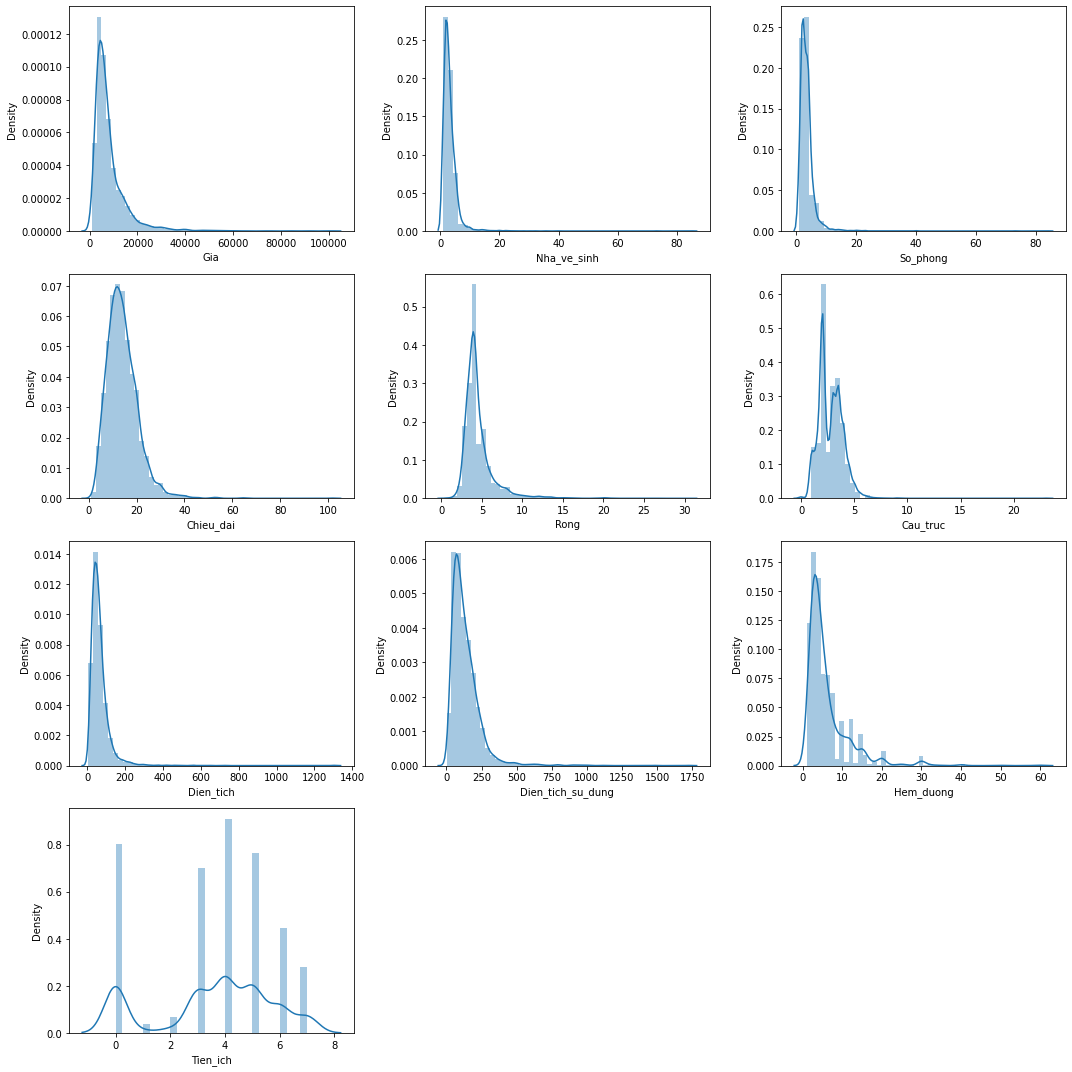

In [25]:
# Vẽ biểu đồ phân phối các biến 
visualize_histogram(num_vars, df)
#=> các biến phân phối lệch phải và nhọn hơn pp chuẩn (trừ biến 'Tien_ich')

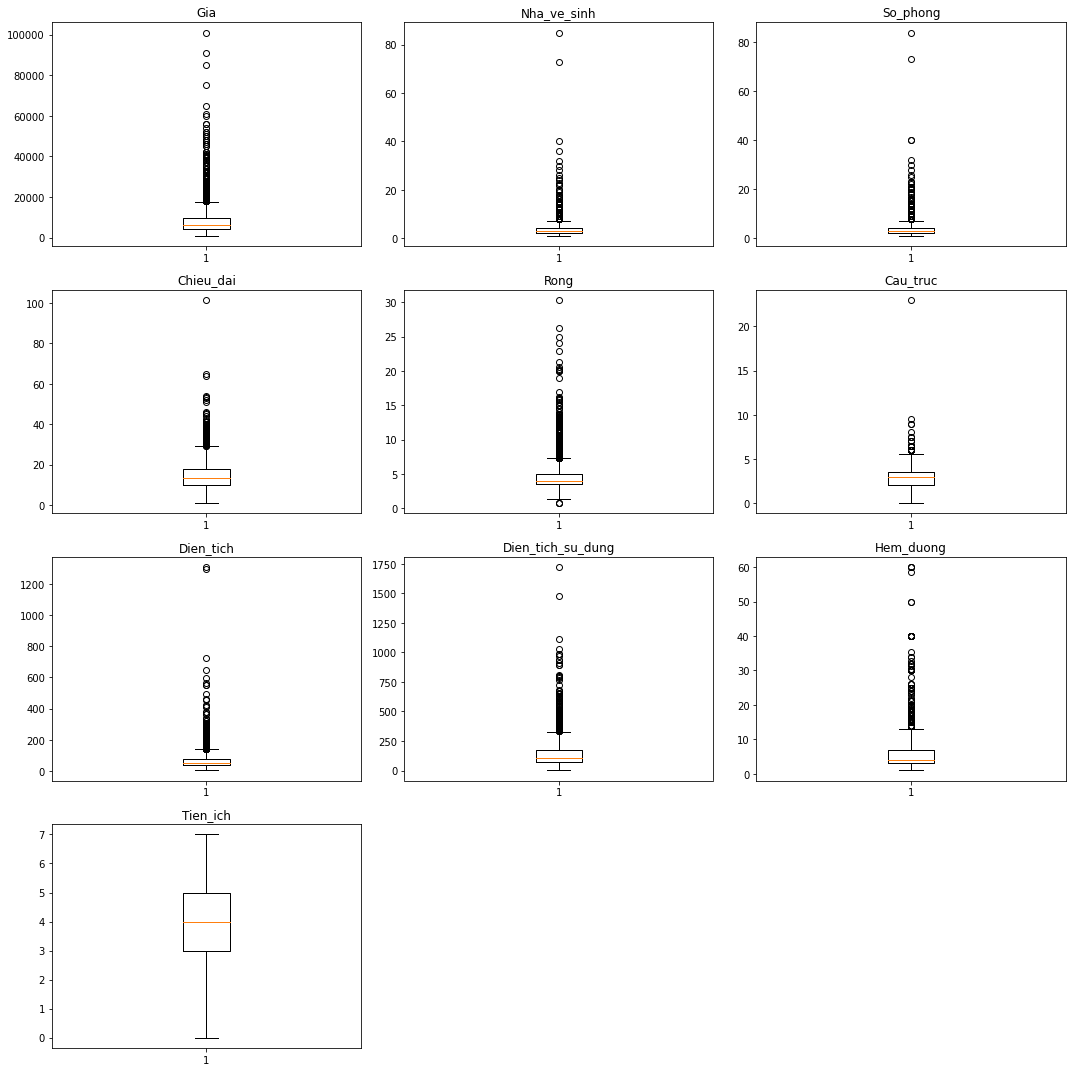

In [26]:
# Vẽ boxplot để kiểm tra outliers
visualize_boxplot(num_vars, df)
#=> Tất cả các biến có upper ouliers, trừ 'Tien_ich' => cần xem xét và xử lý các outliers 

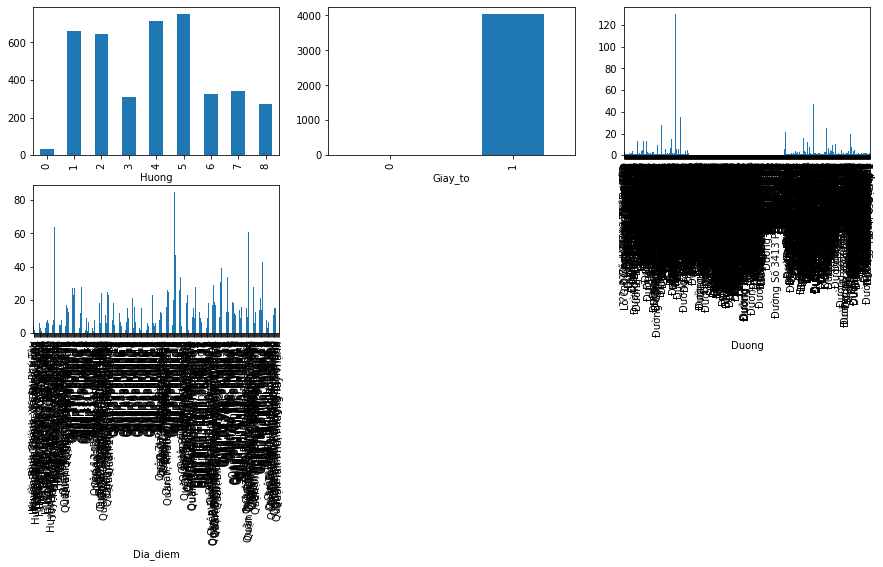

In [27]:
# Categorical variables 
# Vẽ barchart xem count của các class của biến cat
visualize_cat_value_count(cat_vars, df)
#=> trừ 'Giay_to', các biến khác chênh lệch khác nhiều giữa các class => có thể ảnh hưởng tới 'Gia'

### --Bivariate analysis
- numerical - numerical (incl.output)
- categorical - categorical
- categorical - numerical (output)

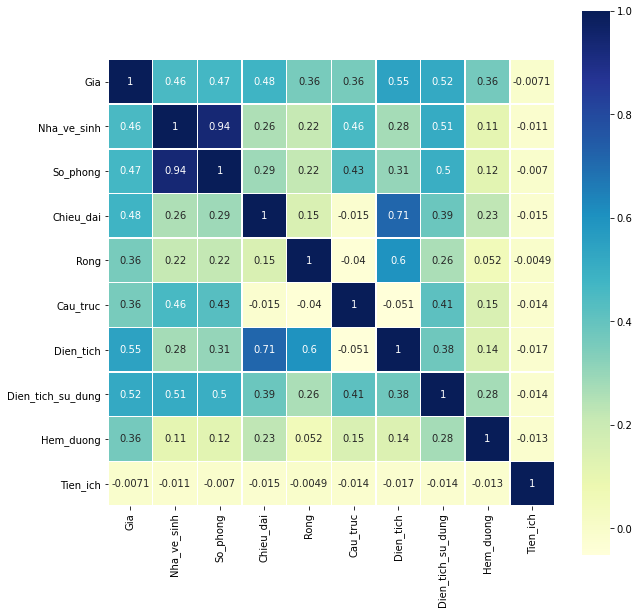

In [28]:
#numerical - numerical (incl.output)
#Vẽ heatmap để xác định những input tương quan với 'Gia', và những input độc lập với nhau 
visualize_heatmap(num_vars, df)

### Nhận xét:
- Những biến tương quan với 'gia': 'nha_ve_sinh', 'so_phong', 'chieu_dai, 'rong', 'cau_truc, dien_tich', 'dien_tich_su_dung', 'duong_mat_tien'
- Trong đó:
    + nha_ve_sinh và so_phong tương quan mạnh => chọn Nha_ve_sinh
    + dien_tich tương quan với 'chieu_dai', 'rong' => chọn dien_tich

In [29]:
# Những biến tương quan với 'gia'
dependent_num_var = ['Nha_ve_sinh','Cau_truc', 'Dien_tich', 'Dien_tich_su_dung', 'Hem_duong']

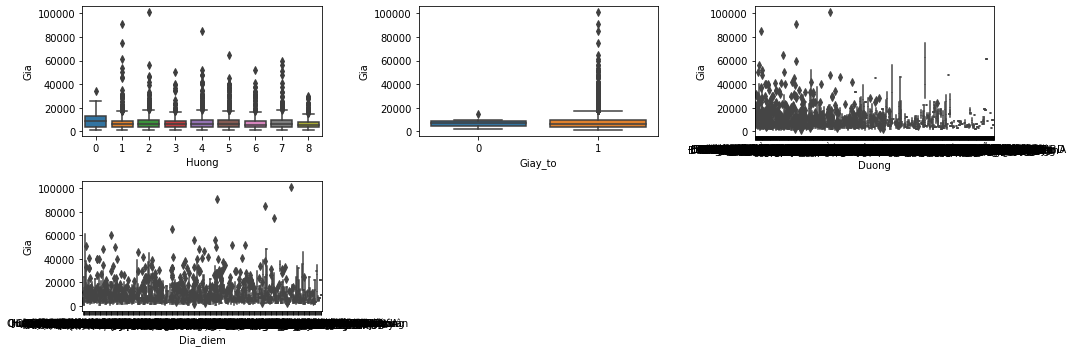

In [30]:
# categorical - 'gia'
# Vẽ boxplot để xem các biến categorical có ảnh hưởng tới 'Gia' không
visualize_boxplot_cat_output(cat_vars, 'Gia', df)
#=> 'Huong' và 'Giay_to' khác nhau đều cho cùng 1 mức giá (nếu ko tính outliers)

In [31]:
#Anova Test -> tìm ra biến phân loại phụ thuộc với 'Gia'
anova_test(cat_vars,'Gia', df)
# => theo Anova chỉ 2 biến 'Duong', 'Dia_diem' có ảnh hưởng tới 'Gia'

['Duong', 'Dia_diem']

In [32]:
#Chi2 Test -> tìm ra các biến category độc lập
chi2_test(cat_vars,df)
# => theo Chi2 test các biến categorical đều phụ thuộc lẫn nhau => Phải loại bớt biến

,Huong,Giay_to,Duong,Dia_diem
Huong,NaN,Dependent,Dependent,Dependent
Giay_to,NaN,NaN,Dependent,Dependent
Duong,NaN,NaN,NaN,Dependent
Dia_diem,NaN,NaN,NaN,NaN


In [33]:
# Những biến categorical được chọn
dependent_cat_var = ['Duong','Dia_diem']

In [34]:
selected_feature = ['Gia','Nha_ve_sinh','Cau_truc', 'Dien_tich', 'Dien_tich_su_dung', 'Hem_duong',
                   'Duong','Dia_diem']

In [35]:
#Tạo dataframe mới bao gồm các biến đã chọn
df_new = df[selected_feature]

In [36]:
df_new.head()

,Gia,Nha_ve_sinh,Cau_truc,Dien_tich,Dien_tich_su_dung,Hem_duong,Duong,Dia_diem
0,3700.0,4,2.0,104.5,134.7,5.0,Đường ấp Thới Tây 2,"Huyện Hóc Môn, Xã Tân Hiệp"
1,3800.0,2,2.0,71.8,137.6,5.0,Đường Huỳnh Tấn Phát,"Huyện Nhà Bè, Xã Phú Xuân"
2,6500.0,5,4.0,52.1,70.3,5.0,Đường Lò Siêu,"Quận 11, Phường 16"
3,54000.0,5,3.0,366.2,341.8,12.0,Đường An Phú,"Quận 2, Phường An Phú"
4,3800.0,2,2.0,24.0,48.0,1.5,Đường Trần Quang Khải,"Quận 1, Phường Tân Định"


## 3. Outliers

In [37]:
#Xem tỉ lệ outliers của các biến numeric
number_of_outliers(dependent_num_var,df_new)

,upper_outliers,lower_outliers,outlier_per
Nha_ve_sinh,135,0,3
Cau_truc,33,0,1
Dien_tich,207,0,5
Dien_tich_su_dung,140,0,3
Hem_duong,343,0,8


In [38]:
# Loại bỏ outliers của các biến 'So_phong','Dien_tich','Dien_tich_su_dung','Hem_duong' 
# Như vậy model sẽ phù hợp với những căn nhà ko quá lớn

In [39]:
df_new = drop_outliers(['Nha_ve_sinh','Dien_tich','Dien_tich_su_dung','Hem_duong'], df_new)

In [40]:
df_new.shape

(3202, 8)

## 4. Build Model

### --Split train/test và Chuẩn hóa dữ liệu

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [42]:
df_new = pd.get_dummies(df_new)

In [43]:
# Split input / output
X = df_new.drop(['Gia'], axis=1)   
y = df_new['Gia']

In [44]:
X.shape, y.shape

((3202, 1101), (3202,))

In [45]:
# Split train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
# Scaler: Các biến không phân phối chuẩn và có outliers => RobustScaler
scaler = RobustScaler()
scaler.fit_transform(X_train, y_train)

array([[ 2.        ,  0.66666667,  0.16326531, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.33333333, -0.3819242 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.5       , -0.33333333,  0.34402332, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.5       ,  0.66666667,  0.47813411, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.33333333,  2.30029155, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.66666667,  0.65889213, ...,  0.        ,
         0.        ,  0.        ]])

### --Cross Validation để chọn thuật toán phù hợp nhất

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

import time
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [48]:
Average_Score_Model(LinearRegression(), X_train, y_train, size=0.25, cv=10)

(-4.809500910754776e+18, 1265.9290313720703)

In [49]:
Average_Score_Model(KNeighborsRegressor(), X_train, y_train, size=0.25, cv=10)

(0.22581158225507494, 24.837231636047363)

In [50]:
Average_Score_Model(RandomForestRegressor(), X_train, y_train, size=0.25, cv=10)

(0.4568889512470469, 5831.2870264053345)

In [51]:
Average_Score_Model(xgb.XGBRegressor(verbosity=0), X_train, y_train, size=0.25, cv=10)

(0.4485377081203293, 8889.805936813354)

### Nhận xét:
- Thuật toán RandomForestRegressor và xgb.XGBRegressor cho kết quả tốt nhất nên lựa chọn để build model

### --Parameter Tuning với 2 Thuật toán đã chọn

In [52]:
# RandomForestRegressor()
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
# forest_model.get_params()

In [54]:
forest_grid = {'n_estimators': [300,500,800,900],
               'max_features': ['auto', 'sqrt','log2'],
               'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5, 10],
               'bootstrap': [True, False]}

forest_tune = RandomizedSearchCV(forest_model, forest_grid, cv=5)
forest_tune.fit(X_train, y_train)

print("Best parameters set:")
print(forest_tune.best_params_)

Best parameters set:
{'n_estimators': 300, 'min_samples_split': 100, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 25, 'bootstrap': True}


In [55]:
# Best parameters set:
# {'n_estimators': 300, 'min_samples_split': 100, 'min_samples_leaf': 2, 
#  'max_features': 'auto', 'max_depth': 25, 'bootstrap': True}

In [56]:
# xgb.XGBRegressor()
xgb_model = xgb.XGBRegressor(verbosity = 0)
xgb_model.fit(X_train, y_train)

XGBRegressor(verbosity=0)

In [ ]:
param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [300,500,600,700],
        'objective': ['reg:squarederror']}
xgb_tune = RandomizedSearchCV(xgb_model, param_tuning, cv=5)
xgb_tune.fit(X_train, y_train)

print("Best parameters set:")
print(xgb_tune.best_params_)

In [58]:
# Best parameters set:
# subsample=0.7, objective='reg:squarederror', n_estimators=700, min_child_weight=1,
# max_depth=10, learning_rate=0.1, colsample_bytree=0.7

### --Tạo Pipeline 

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [25]:
dependent_cat_var = ['Duong','Dia_diem']
dependent_num_var = ['Nha_ve_sinh','Cau_truc', 'Dien_tich','Dien_tich_su_dung', 'Hem_duong']
cat_transformer = OneHotEncoder(handle_unknown='ignore')
cont_transformer = RobustScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cont', cont_transformer, dependent_num_var),
        ('cat', cat_transformer, dependent_cat_var)])

In [26]:
#pipe với RandomForest
forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('forest_model', RandomForestRegressor(n_estimators=300, min_samples_split=100, 
                                    min_samples_leaf=2, max_features='auto', max_depth=25, bootstrap= True))
                      ])

#pipe với XGB
xgb_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('xgb_model', xgb.XGBRegressor(subsample=0.7, objective='reg:squarederror', n_estimators=700, 
                                    min_child_weight=1, max_depth=10, learning_rate=0.1, colsample_bytree=0.7))
                      ])

### --Model validation

In [27]:
# Load lại data & clean
df_final=load_n_clean_data_train('House_data.xlsx')

In [28]:
df_final.shape

(4130, 8)

In [29]:
X = df_final.drop(['Gia'], axis=1)   
y = df_final['Gia']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
forest_pipe.fit(X_train, y_train)
result1 = regression_model_evaluation('RandomForest_model', forest_pipe, X_train, y_train, X_test,y_test)

xgb_pipe.fit(X_train, y_train)
result2 = regression_model_evaluation('XGB_model', xgb_pipe, X_train, y_train, X_test,y_test)

result = pd.concat([result1,result2],axis=0)
result

,R2_train,R2_test,RMSE_test
RandomForest_model,0.648146,0.529685,5159.231875
XGB_model,0.996041,0.620468,4634.625677


### Nhận xét:
- Model XGB tuy có hiện tượng overfitting nhưng score test vẫn cao hơn Model RandomForest và RMSE cũng thấp hơn => chọn model XGB

In [31]:
#Save model đã chọn
import pickle
pkl_filename = "house_xgb_model_DamThiMinhPhuong_K269.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(xgb_pipe, file)